![Banner](Images/car.jpg)

# US Traffic Accident Analysis and Recommendations

## Overview

The project analyzes U.S. traffic accident data to understand what factors contribute to severe accidents. Using weather conditions, time of day, location, and road features, the goal is to identify patterns that increase accident severity and support data-driven safety recommendations. The analysis combines exploratory data analysis, statistical testing, and visualization to uncover high-risk conditions and locations. Severe traffic accidents are most strongly influenced by poor weather conditions (fog, snow, heavy rain), low visibility, high-traffic times of day, and certain road features such as junctions and railway crossings. States with dense traffic volumes account for the highest number of severe crashes, particularly during rush hours and nighttime periods. Improving visibility, weather-related driving safety, and traffic control at high-risk road features would have the greatest impact on reducing severe accidents.

## Business Understanding

**Business Scenario:**

Traffic accidents are a major public safety concern in the United States, leading to loss of life, injuries, and significant economic costs. Understanding the factors that contribute to accident severity can help city planners, transportation departments, and emergency services make data-driven decisions to improve road safety and resource allocation.

The U.S. Accidents dataset contains detailed records of approximately 7.7 million traffic accidents, including information on location, time, weather, and road conditions. By analyzing this data, we can identify patterns and key risk factors that increase accident severity.

**Analytical Questions:**

1. What factors contribute most to severe traffic accidents in the U.S.?

2. How do weather conditions (e.g.,temperature, visibility) influence accident severity?

3. Which locations (states, cities) and time periods (day/night, weekday/weekend, hour of day) experience the highest number of severe accidents?

4. How do specific road or traffic features (junctions, traffic signals, crossings, bumps) influence accident severity?

**Benefits and Goals:**

1. Improved public safety: Identifying patterns helps local authorities prioritize high-risk areas and conditions.

2. Efficient resource allocation: Insights can guide emergency response planning and infrastructure investment.

3. Preventive policy design: Enables data-driven decision-making for speed limits, signage, and road design improvements.

4. Targeted prevention programs: Enables proactive interventions before severe accidents occur.

**Stakeholders:**

1. Department of Transportation (DOT): To plan infrastructure improvements and reduce accident risks.

2. Emergency Response Teams: To allocate resources more effectively based on high-severity zones.

3. City Traffic Planners and Engineers: To optimize signal placement, road designs, and traffic calming measures.

4. Public Safety and Transportation Researchers: To develop predictive models for future risk prevention.

## Data Understanding

Data understanding is the process of loading, examining, and familiarizing with the US Accidents dataset to identify its structure, key variables, and initial data quality issues before analysis.

In [1]:
# Load relevant imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset (used 500000 rows because 7.7 million rows may have memory issue)
df = pd.read_csv('Data/US_Accidents_March23.csv', nrows=500000)

In [3]:
# Explore the dataset 
# Display first few rows
print("\nFirst few rows:")
print(df.head())


First few rows:
    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False          

In [4]:
# Basic information
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            500000 non-null  object 
 11  Street                 500000 non-null  object 
 12  City                   499978 non-null  object 
 13  County                 500000 non-null  object 
 14  State                

In [5]:
# Check dimensions
print("\nDataset Shape:")
print(df.shape)


Dataset Shape:
(500000, 46)


In [6]:
# List columns
print("\nList Columns:")
print(df.columns.tolist())


List Columns:
['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [7]:
# Summary statistics 
# Numerical columns
print("\nNumerical columns:")
print(df.describe())


Numerical columns:
            Severity      Start_Lat      Start_Lng  End_Lat  End_Lng  \
count  500000.000000  500000.000000  500000.000000      0.0      0.0   
mean        2.374690      35.929426     -97.590381      NaN      NaN   
std         0.486796       5.032482      18.280944      NaN      NaN   
min         1.000000      25.433098    -123.813927      NaN      NaN   
25%         2.000000      32.811352    -118.096634      NaN      NaN   
50%         2.000000      34.247250     -95.543968      NaN      NaN   
75%         3.000000      40.134354     -81.565750      NaN      NaN   
max         4.000000      48.199970     -70.571518      NaN      NaN   

        Distance(mi)  Temperature(F)  Wind_Chill(F)    Humidity(%)  \
count  500000.000000   492750.000000   62359.000000  492085.000000   
mean        0.065294       64.668092      30.422478      64.529433   
std         0.782881       16.877594      15.796170      21.387837   
min         0.000000      -77.800000     -29.300000

In [8]:
# Categorical columns
print("\nCategorical columns:")
print(df.describe(include='object'))


Categorical columns:
            ID   Source           Start_Time             End_Time  \
count   500000   500000               500000               500000   
unique  500000        2               492500               488976   
top        A-1  Source2  2016-04-10 08:59:26  2016-10-14 19:50:00   
freq         1   495498                   35                   24   

                                             Description  Street     City  \
count                                             500000  500000   499978   
unique                                            347298   45167     4457   
top     Accident on I-80 Westbound at Exits 8A 8B I-880.   I-5 N  Houston   
freq                                                  68    6487    26484   

             County   State Zipcode Country    Timezone Airport_Code  \
count        500000  500000  499942  500000      499942       499940   
unique          584      29   77298       1           4          663   
top     Los Angeles      CA   

In [9]:
# Boolean columns
print("\nBoolean columns:")
print(df.describe(include='bool'))


Boolean columns:
       Amenity    Bump Crossing Give_Way Junction No_Exit Railway Roundabout  \
count   500000  500000   500000   500000   500000  500000  500000     500000   
unique       2       2        2        2        2       2       2          2   
top      False   False    False    False    False   False   False      False   
freq    491247  499857   429865   496888   468077  499136  495098     499983   

       Station    Stop Traffic_Calming Traffic_Signal Turning_Loop  
count   500000  500000          500000         500000       500000  
unique       2       2               2              2            1  
top      False   False           False          False        False  
freq    482256  484264          499581         385083       500000  


**Variable Documentation and Analytical Relevance:**

| Variable                                 | Description                   | Relevance to Analysis                                                                         
| -----------------------------------| ------------------------------------|-----------------------------------------|
| **ID**                             | Unique identifier for each accident record. | Helps uniquely reference and count accidents.|
| **Severity**                       | Accident severity on a scale (typically 1–4), where higher values indicate more serious accidents. | Target variable for understanding which conditions lead to more severe accidents.|
| **Start_Time / End_Time**          | Timestamp of when the accident began and ended.| Useful for analyzing accidents by time of day, peak traffic hours, and duration.|
| **Start_Lat / Start_Lng**          | Geographic coordinates where the accident occurred. | Used for mapping hotspots and spatial analysis.|
| **Distance(mi)**                   | Estimated length of road affected by the accident. | May correlate with severity and roadway impact.                                               |
| **Street / City / County / State / Zipcode** | Location details of the accident. | Helps identify high-risk locations and compare regional accident trends.|
| **Temperature(F)**                 | Air temperature at the time of accident. | Allows analysis of weather impact, such as accidents in cold or hot conditions.|
| **Humidity(%)**                    | Atmospheric moisture at the time. | High humidity may be linked to fog, rain, or slippery conditions.|
| **Pressure(in)**                   | Atmospheric pressure measurement. | Lower pressure can indicate storms and severe weather.|
| **Visibility(mi)**                 | Distance drivers can see ahead. | Low visibility is often linked to higher accident severity.|
| **Wind_Speed(mph)**                | Wind speed measurement. | Strong winds may contribute to accidents in open or highway areas. |
| **Precipitation(in)**              | Amount of rainfall or snowfall. | Important for assessing the impact of rain, snow, and wet road conditions.|
| **Weather_Condition**              | Text description of weather (e.g., Overcast, Light Rain, Fog). | Key variable for linking weather patterns to severity. |
| **Amenity / Bump / Crossing / Junction / Traffic_Signal** | Road environment indicators that describe nearby road features. | Helps determine if road design elements contribute to accident frequency/severity.|
| **Sunrise_Sunset / Civil_Twilight / Nautical_Twilight / Astronomical_Twilight** | Indicates lighting conditions (day vs night). | Useful to analyze whether accidents are more severe in low-light or nighttime conditions. |

In [10]:
# Assess data quality issues 
# Missing Values
missing = df.isnull().sum()
missing_pct = (df.isnull().mean() * 100).round(2)
missing_summary = pd.DataFrame({'Missing_Values': missing, 'Missing_%': missing_pct})
print("\nMissing Value Summary (Top 10):\n")
print(missing_summary.sort_values(by='Missing_%', ascending=False).head(10))


Missing Value Summary (Top 10):

                   Missing_Values  Missing_%
End_Lat                    500000     100.00
End_Lng                    500000     100.00
Precipitation(in)          448054      89.61
Wind_Chill(F)              437641      87.53
Wind_Speed(mph)             89040      17.81
Visibility(mi)              10539       2.11
Weather_Condition           10185       2.04
Humidity(%)                  7915       1.58
Temperature(F)               7250       1.45
Pressure(in)                 5739       1.15


In [11]:
# Outliers
# Select numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute IQR and count outliers per column
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

print("\nTop columns with potential outliers:\n")
print(outliers.sort_values(ascending=False).head(10))


Top columns with potential outliers:

Visibility(mi)       88346
Pressure(in)         24319
Distance(mi)         10656
Wind_Speed(mph)       9504
Temperature(F)        7281
Precipitation(in)     5135
Wind_Chill(F)         3838
Severity                 0
Start_Lat                0
Start_Lng                0
dtype: int64


In [12]:
# Inconsistency Checks
# 1. Check duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# 2. Standardize categorical column formatting
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip().str.title())

# 3. Check for some invalid numeric values
if 'Visibility(mi)' in df.columns:
    print("Visibility < 0:", (df['Visibility(mi)'] < 0).sum())

if 'Temperature(F)' in df.columns:
    print("Temperature below plausible minimum (< -50F):", (df['Temperature(F)'] < -50).sum())

if 'Wind_Speed(mph)' in df.columns:
    print("Wind Speed < 0:", (df['Wind_Speed(mph)'] < 0).sum())


Duplicate rows: 0
Visibility < 0: 0
Temperature below plausible minimum (< -50F): 4
Wind Speed < 0: 0


## Data Preparation
Data preparation involves cleaning and transforming the dataset to ensure that the data is accurate, consistent, and ready for analysis.

In [13]:
# Handle missing values
# Drop columns with too many missing values (e.g., >40%)
df = df.dropna(thresh=len(df)*0.6, axis=1)

# Fill remaining missing numeric values with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

# Fill missing boolean values with False
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].fillna(False)

print("\nMissing values handled successfully (numeric, categorical, and boolean).")


Missing values handled successfully (numeric, categorical, and boolean).


In [14]:
# Address outliers that may skew analysis
# Check skewness before applying better method for treatment
# Select only numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].skew().sort_values(ascending=False)

Wind_Speed(mph)    46.817819
Distance(mi)       34.345733
Severity            0.512124
Start_Lat          -0.027081
Start_Lng          -0.156732
Humidity(%)        -0.306176
Temperature(F)     -0.576263
Visibility(mi)     -1.163516
Pressure(in)      -26.403780
dtype: float64

In [15]:
# Based on skewness results, only a few variables truly need outlier treatment
# Apply Log / sqrt transform for extreme skew and IQR capping only for those selected columns
# Columns selected based on skewness
high_skew_cols = ['Wind_Speed(mph)', 'Distance(mi)', 'Pressure(in)']

# Apply transformations
df['Wind_Speed(mph)'] = np.sqrt(df['Wind_Speed(mph)'])
df['Distance(mi)'] = np.log1p(df['Distance(mi)'])
df['Pressure(in)'] = np.log1p(df['Pressure(in)'])

# IQR capping ONLY on transformed high-skew columns
Q1 = df[high_skew_cols].quantile(0.25)
Q3 = df[high_skew_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df[high_skew_cols] = df[high_skew_cols].clip(lower=lower, upper=upper, axis=1)

print("n\Outliers addressed for highly skewed numeric variables.")

n\Outliers addressed for highly skewed numeric variables.


<>:21: SyntaxWarning: invalid escape sequence '\O'
<>:21: SyntaxWarning: invalid escape sequence '\O'
C:\Users\babur\AppData\Local\Temp\ipykernel_20788\2753358327.py:21: SyntaxWarning: invalid escape sequence '\O'
  print("n\Outliers addressed for highly skewed numeric variables.")


In [16]:
# Convert data types
# Convert datetime
for c in ['Start_Time','End_Time','Weather_Timestamp']:
    if c in df: df[c] = pd.to_datetime(df[c], errors='coerce')

# Convert categorical
cat_cols = ['Source','State','City','County','Country','Timezone',
            'Airport_Code','Weather_Condition','Sunrise_Sunset',
            'Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
for c in cat_cols:
    if c in df: df[c] = df[c].astype('category')

# Convert booleans
bool_cols = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit',
             'Railway','Roundabout','Station','Stop','Traffic_Calming',
             'Traffic_Signal','Turning_Loop']
for c in bool_cols:
    if c in df: df[c] = df[c].astype('bool')

print("\nData types converted.")


Data types converted.


In [17]:
# Create derived features
# Accident duration in hours
df['Duration_hrs'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 3600

# Time-based features for trend analysis
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Hour'] = df['Start_Time'].dt.hour

# Weekend feature
df['Is_Weekend'] = (df['Start_Time'].dt.dayofweek >= 5).astype(int)

print("\nDerived features created successfully.")


Derived features created successfully.


In [18]:
# Summary statistics 
# Numeric columns
print("\nNumeric Summary:")
display(df.describe())

# Categorical columns
print("\nCategorical Summary:")
display(df.describe(include='object'))

# Boolean columns
print("\nBoolean Summary:")
display(df.describe(include='bool'))


Numeric Summary:


,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Duration_hrs,Year,Month,Hour,Is_Weekend
count,500000.000000,500000,500000,500000.000000,500000.000000,500000.000000,500000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,2.374690,2016-12-09 23:17:07.875920128,2016-12-09 23:57:49.711313664,35.929426,-97.590381,0.005983,2016-12-10 03:55:13.930319360,64.690305,64.552712,3.434289,9.244186,2.878240,0.678288,2016.437478,6.551996,12.716656,0.118910
min,1.000000,2016-02-08 05:46:00,2016-02-08 06:37:59,25.433098,-123.813927,0.000000,2016-02-08 05:51:00,-77.800000,4.000000,3.420596,0.000000,1.183443,0.172778,2016.000000,1.000000,0.000000,0.000000
25%,2.000000,2016-09-07 23:49:22.249999872,2016-09-08 00:29:24.249999872,32.811352,-118.096634,0.000000,2016-09-08 12:53:00,55.000000,49.000000,3.430756,10.000000,2.408319,0.495556,2016.000000,4.000000,9.000000,0.000000
50%,2.000000,2016-12-07 15:07:28,2016-12-07 15:53:21,34.247250,-95.543968,0.009950,2016-12-08 17:51:00,66.200000,66.000000,3.433987,10.000000,2.846050,0.506389,2016.000000,6.000000,12.000000,0.000000
75%,3.000000,2017-03-16 14:36:37.500000,2017-03-16 15:11:09.750000128,40.134354,-81.565750,0.009950,2017-03-15 18:52:00,77.000000,82.000000,3.437529,10.000000,3.224903,0.746944,2017.000000,10.000000,17.000000,0.000000
max,4.000000,2017-07-30 20:08:42,2017-07-30 20:53:26,48.199970,-70.571518,0.024876,2017-07-30 20:14:00,161.600000,100.000000,3.447689,111.000000,4.449779,5616.000000,2017.000000,12.000000,23.000000,1.000000
std,0.486796,NaN,NaN,5.032482,18.280944,0.005826,NaN,16.755785,21.218671,0.005662,2.120419,0.636528,8.187449,0.496076,3.402853,5.205417,0.323683



Categorical Summary:


,ID,Description,Street,Zipcode,Wind_Direction,DayOfWeek
count,500000,500000,500000,500000,500000,500000
unique,500000,347094,45163,77298,23,7
top,A-1,Accident On I-80 Westbound At Exits 8A 8B I-880.,I-5 N,91706,Calm,Thursday
freq,1,68,6487,1354,84056,90234



Boolean Summary:


,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
count,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000,500000
unique,2,2,2,2,2,2,2,2,2,2,2,2,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,491247,499857,429865,496888,468077,499136,495098,499983,482256,484264,499581,385083,500000


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) involves examining and visualizing the dataset to uncover patterns, trends, and relationships that help answer the business questions and guide data-driven insights. 

**Business Question 1:**

What factors contribute most to severe traffic accidents in the U.S.?

Analysis Plan:

- Compare severity across weather conditions.

- Analyze severity vs visibility and temperature.

- Check severity across road features (junction, crossing, traffic signals).

- Analyze severity trends over time (hour of day).

- Examine correlations between severity and numeric variables.

C:\Users\babur\AppData\Local\Temp\ipykernel_20788\1840898270.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order=df.groupby('Weather_Condition')['Severity'].mean().sort_values().index


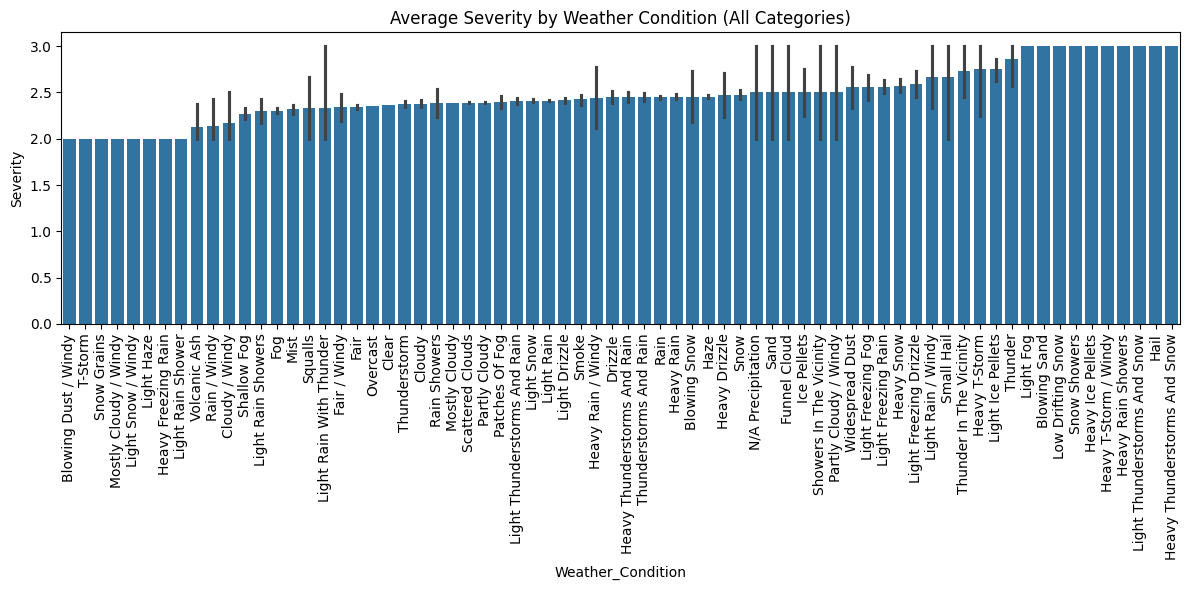

In [19]:
# Visualization
# Average Severity by Weather Condition
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='Weather_Condition',
    y='Severity',
    estimator='mean',
    order=df.groupby('Weather_Condition')['Severity'].mean().sort_values().index
)
plt.xticks(rotation=90)
plt.title("Average Severity by Weather Condition (All Categories)")
plt.tight_layout()
plt.show()

Interpretation: Weather conditions like Fog, Snow, and Heavy Rain show higher average accident severity, while conditions such as Clear and Partly Cloudy have lower severity. This indicates that reduced visibility and slippery road conditions significantly increase the severity of traffic accidents.

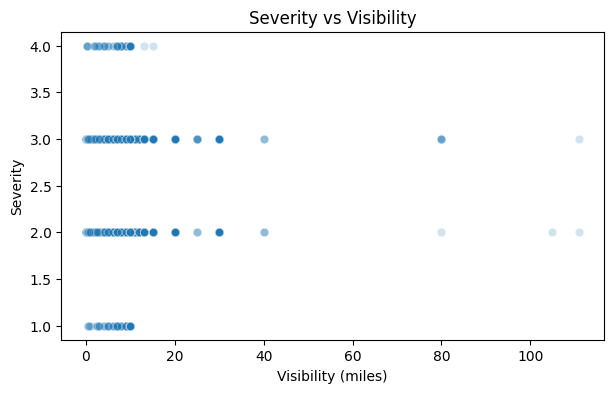

In [20]:
# Visibility vs Severity
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='Visibility(mi)', y='Severity', alpha=0.2)
plt.title("Severity vs Visibility")
plt.xlabel("Visibility (miles)")
plt.ylabel("Severity")
plt.show()

Interpretation: Higher accident severity tends to occur at lower visibility levels, indicating that poor visibility contributes to more severe accidents.

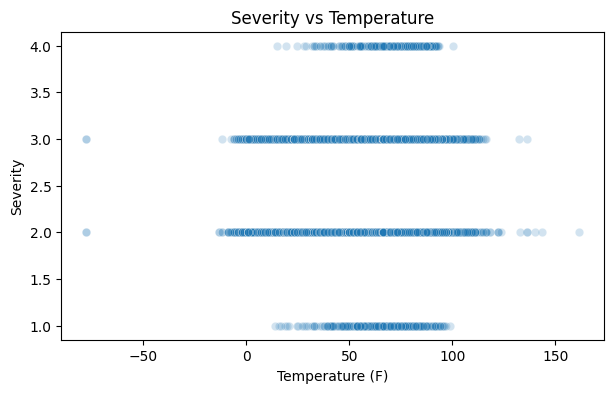

In [21]:
# Temperature vs Severity
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='Temperature(F)', y='Severity', alpha=0.2)
plt.title("Severity vs Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Severity")
plt.show()

Interpretation: Accident severity does not show a strong relationship with temperature. Severe accidents occur across a wide range of temperatures, suggesting that temperature alone is not a major driver of accident severity.

<Figure size 800x400 with 0 Axes>

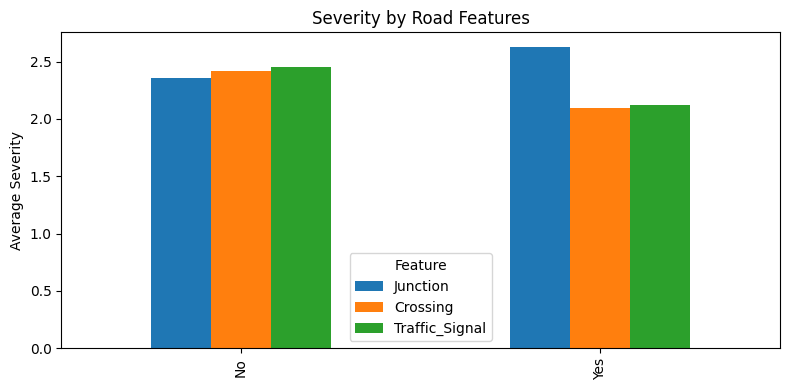

In [22]:
# Severity Across Road Features
plt.figure(figsize=(8,4))

severity_by_feature = {
    col: df.groupby(col)['Severity'].mean() for col in ['Junction','Crossing','Traffic_Signal']
}

pd.DataFrame(severity_by_feature).plot(kind='bar', figsize=(8,4))

plt.title("Severity by Road Features")
plt.ylabel("Average Severity")
plt.xticks([0,1], ['No','Yes'])
plt.legend(title="Feature")
plt.tight_layout()
plt.show()

Interpretation: Junction has higher average severity, while crossing and traffic_signal have slightly 
lower severity when present compared to other locations.

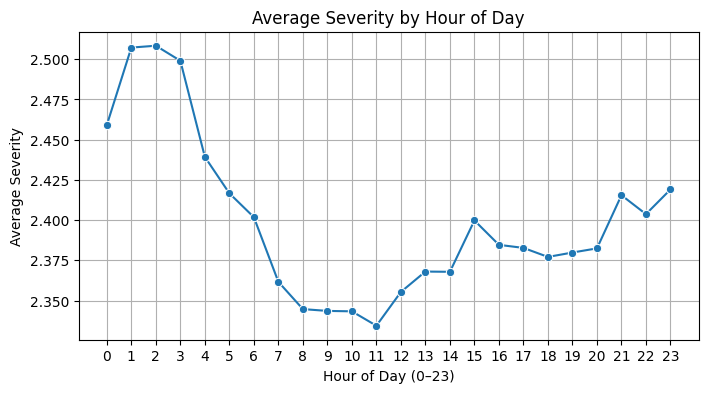

In [23]:
# Severity by Hour of Day
# Extract hour 
df['Hour'] = df['Start_Time'].dt.hour

# Compute mean severity per hour
hourly_severity = df.groupby('Hour')['Severity'].mean().reset_index()

# Plot
plt.figure(figsize=(8,4))
sns.lineplot(data=hourly_severity, x='Hour', y='Severity', marker='o')
plt.title("Average Severity by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Severity")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

Interpretation: Average severity fluctuates throughout the day. It rises slightly during night hours, rises around 1-2 AM, drops around 2–8 AM, constant from 8-10 AM and continues to vary throughtout.

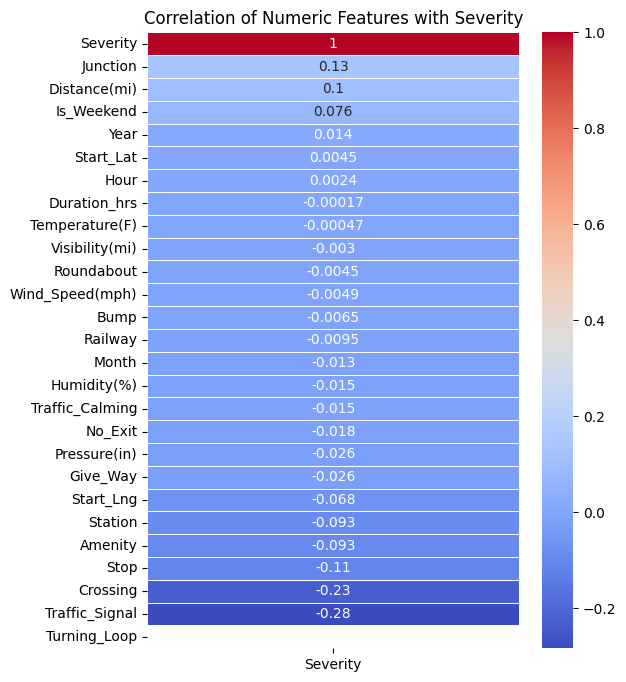

In [24]:
# Compute Correlations with Severity only
corr = df.corr(numeric_only=True)['Severity'].sort_values(ascending=False).to_frame()

# Plot heatmap
plt.figure(figsize=(6,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Numeric Features with Severity")
plt.show()

Interpretation: Most numeric features show weak correlation with severity, meaning no single variable strongly predicts accident severity on its own. Any positive or negative correlations are minor and indicate only small linear relationships.

**Business Question 2:** 

How do weather conditions (e.g., rain, fog, temperature, visibility) influence accident severity?

Analysis Plan:

- Compare severity across major weather types.

- Analyze severity vs visibility levels.

- Analyze severity vs temperature.

- Check correlations between severity and weather variables.

C:\Users\babur\AppData\Local\Temp\ipykernel_20788\1840898270.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order=df.groupby('Weather_Condition')['Severity'].mean().sort_values().index


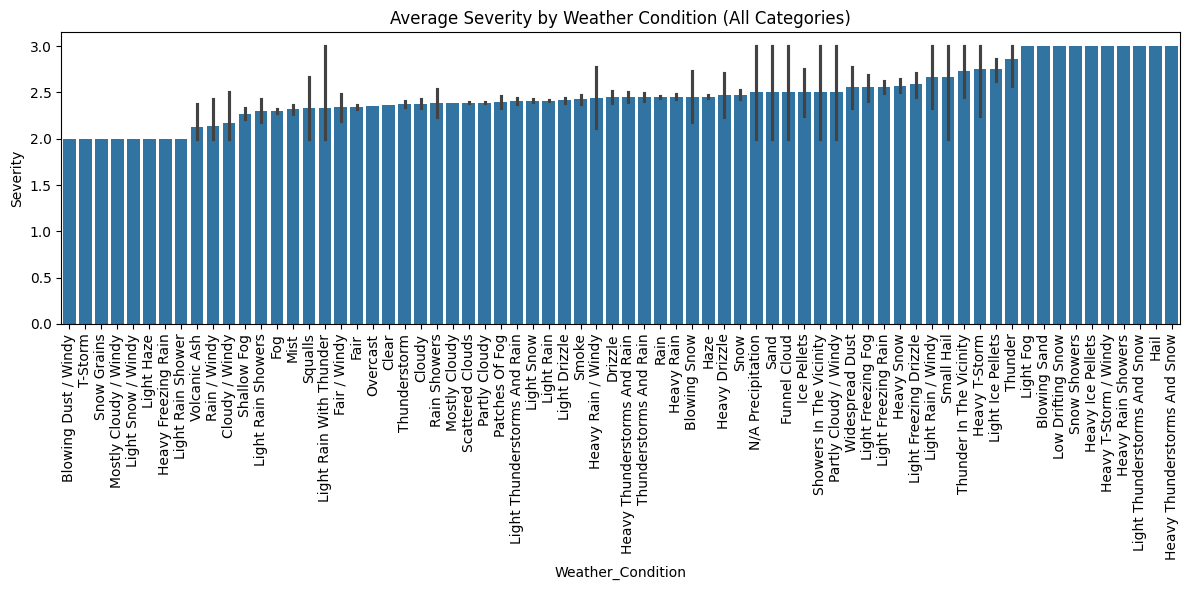

In [25]:
# Visualization
# Average Severity by Weather Condition
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x='Weather_Condition',
    y='Severity',
    estimator='mean',
    order=df.groupby('Weather_Condition')['Severity'].mean().sort_values().index
)
plt.xticks(rotation=90)
plt.title("Average Severity by Weather Condition (All Categories)")
plt.tight_layout()
plt.show()

Interpretation: Weather conditions like Fog, Snow, and Heavy Rain show higher average accident severity, while conditions such as Clear and Partly Cloudy have lower severity. This indicates that reduced visibility and slippery road conditions significantly increase the severity of traffic accidents.

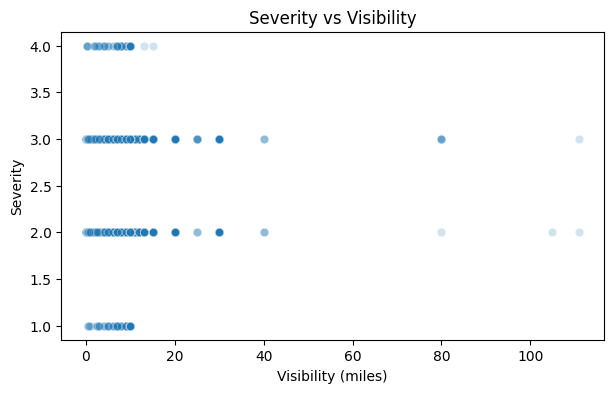

In [26]:
# Visibilty vs Severity
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='Visibility(mi)', y='Severity', alpha=0.2)
plt.title("Severity vs Visibility")
plt.xlabel("Visibility (miles)")
plt.ylabel("Severity")
plt.show()

Interpretation: Higher accident severity tends to occur at lower visibility levels, indicating that poor visibility contributes to more severe accidents.

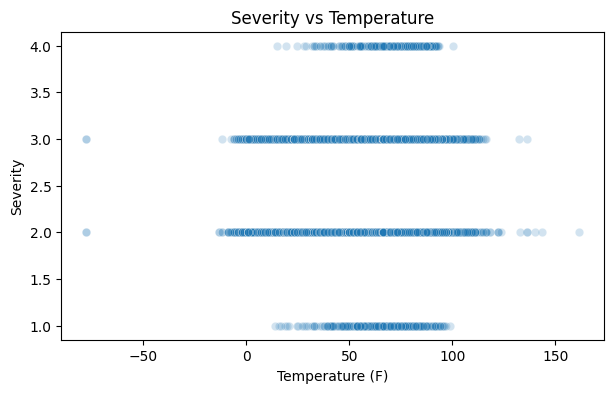

In [27]:
# Temperature vs Severity
plt.figure(figsize=(7,4))
sns.scatterplot(data=df, x='Temperature(F)', y='Severity', alpha=0.2)
plt.title("Severity vs Temperature")
plt.xlabel("Temperature (F)")
plt.ylabel("Severity")
plt.show()

Interpretation: Accident severity does not show a strong relationship with temperature. Severe accidents occur across a wide range of temperatures, suggesting that temperature alone is not a major driver of accident severity.

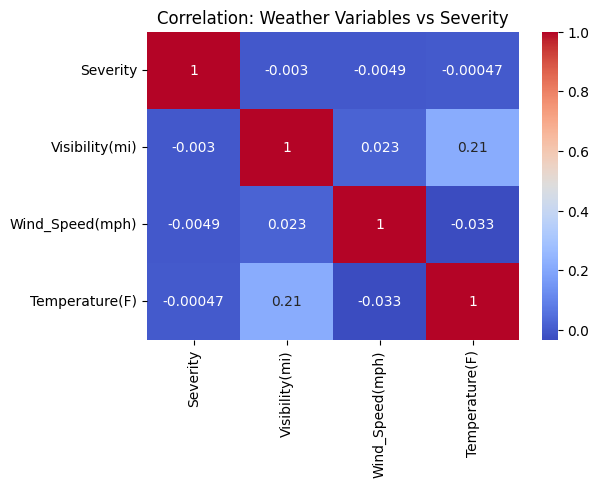

In [28]:
# Weather Variable Correlation Heatmap (Precipitation(in) column is dropped due to maximum NAN values)
weather_cols = ['Severity',
                'Visibility(mi)',
                'Wind_Speed(mph)',
                'Temperature(F)']

corr = df[weather_cols].corr(numeric_only=True)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation: Weather Variables vs Severity')
plt.show()

Interpretation: Weather variables show weak correlations with accident severity, suggesting limited direct impact individually.

**Business Question 3:**

Which states, cities, and times (day/night, weekday/weekend) have the highest number of severe accidents?

Analysis Plan:

- Identify top states with the most severe accidents.

- Identify top cities with the most severe accidents.

- Compare severity by time of day (day vs night).

- Compare severity by weekday vs weekend.

- Analyze hourly patterns of severe accidents.

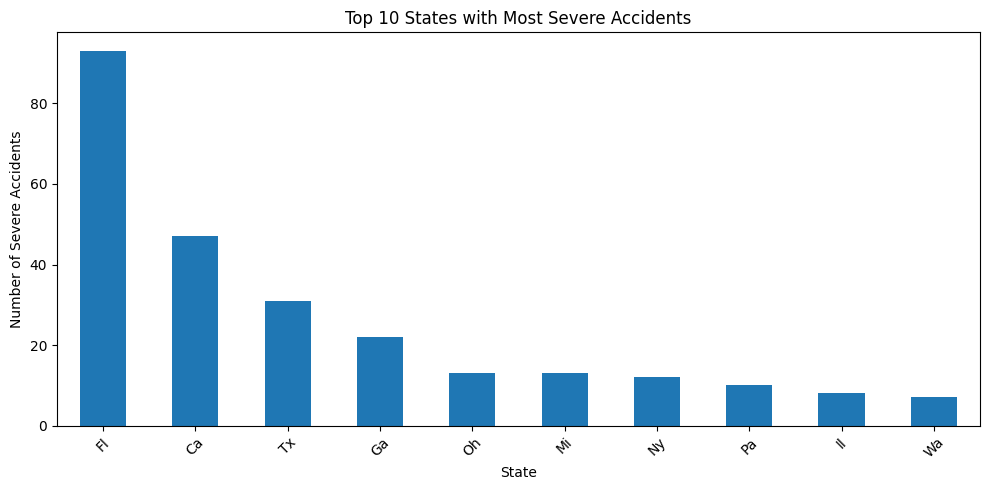

In [29]:
# Top 10 States with Most Severe Accidents (Severity = 4)
severe = df[df['Severity'] == 4]

plt.figure(figsize=(10,5))
severe['State'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 States with Most Severe Accidents")
plt.xlabel("State")
plt.ylabel("Number of Severe Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretation: These states report the most severe accidents, showing that severe crashes are more common in these areas than others.

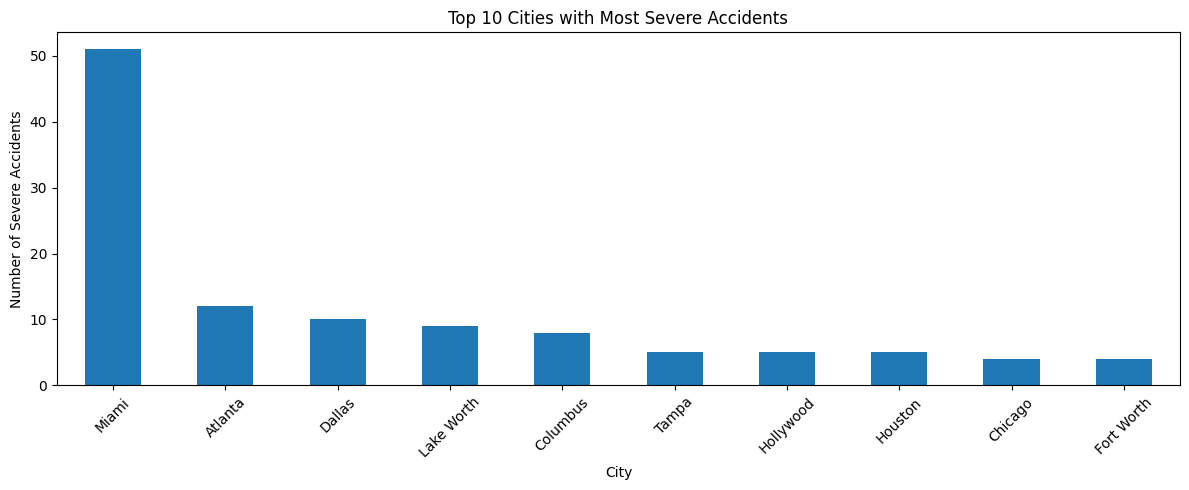

In [30]:
# Top 10 Cities with Most Severe Accidents (Severity = 4)
severe = df[df['Severity'] == 4]

plt.figure(figsize=(12,5))
severe['City'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Cities with Most Severe Accidents")
plt.xlabel("City")
plt.ylabel("Number of Severe Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretation: These cities report the most severe accidents, showing that severe crashes are more common in these areas than others.

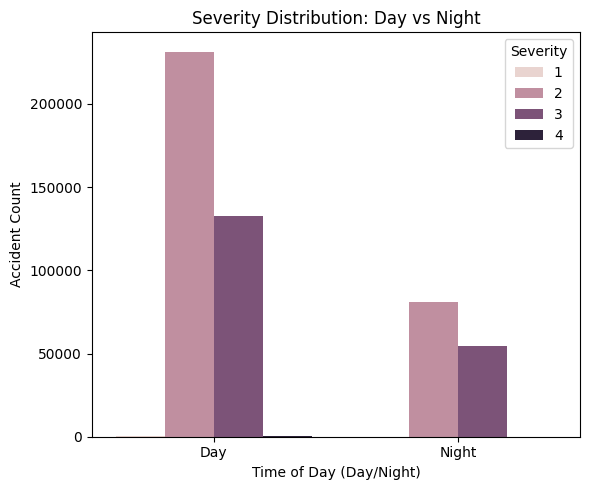

In [31]:
# Day vs Night severity 
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Sunrise_Sunset', hue='Severity')
plt.title("Severity Distribution: Day vs Night")
plt.xlabel("Time of Day (Day/Night)")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()

Interpretation: Severity during the day is highter than at night.

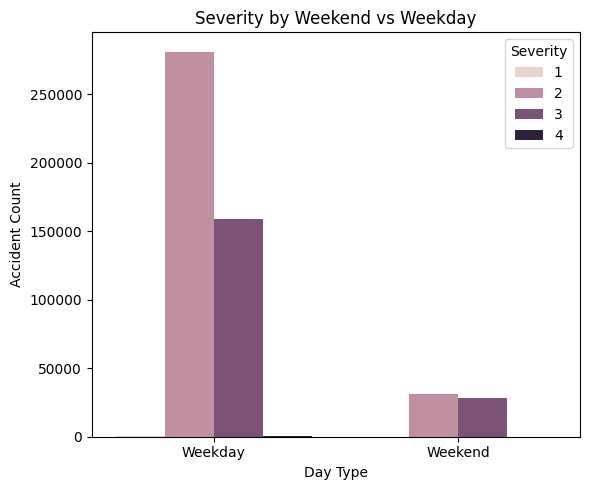

In [32]:
# Weekday vs Weekend severity 
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='Is_Weekend', hue='Severity')

plt.title("Severity by Weekend vs Weekday")
plt.xlabel("Day Type")
plt.ylabel("Accident Count")

# Replace 0/1 labels with readable text
plt.xticks([0, 1], ["Weekday", "Weekend"])

plt.tight_layout()
plt.show()

Interpretation: Severity during weekday is higher than weekend due to high traffic flows.

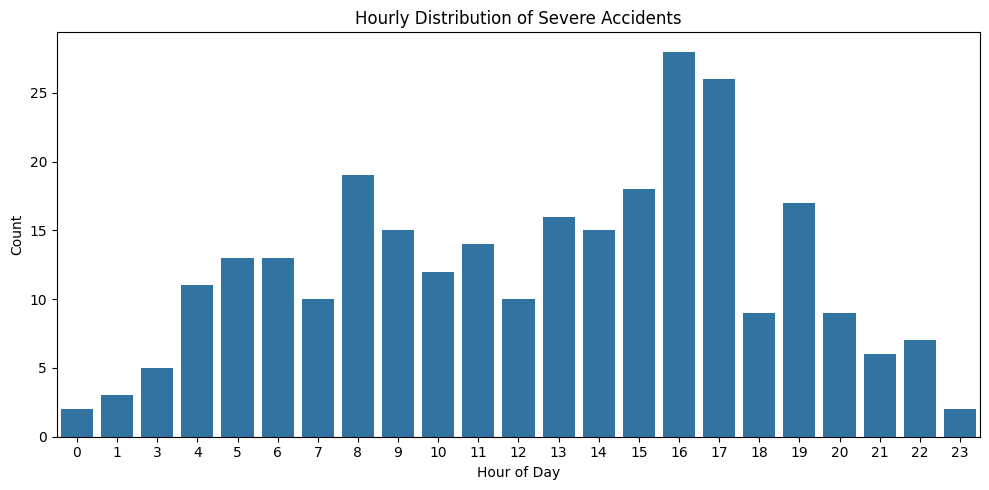

In [33]:
# Hourly pattern of severe accidents 
severe = df[df['Severity'] == 4]

plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=severe)
plt.title("Hourly Distribution of Severe Accidents")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Interpretation: Severity stays low around 1–2 AM, rises until around 5-6 AM, then fluctuates through the day. It reaches its highest level around 4 PM and gradually decreases afterward.

**Business Question 4:**

Are certain road or traffic conditions linked to higher severity?

Analysis Plan:

- Compare average severity across key road features (Junction, Crossing, Traffic Signal).

- Analyze severity differences for road conditions such as Bump, No Exit, Railway, Roundabout.

- Examine how severity changes with road type factors (Amenity, Station, Stop).

- Identify which road features contribute the most to high-severity accidents.

<Figure size 800x400 with 0 Axes>

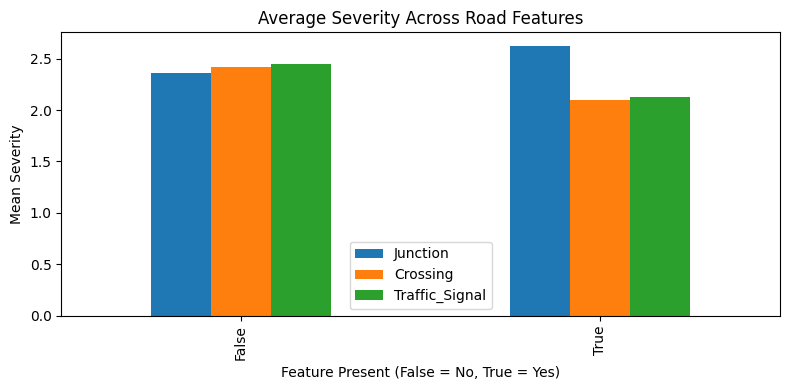

In [34]:
# Average Severity Across Road Features
plt.figure(figsize=(8,4))

features = ['Junction', 'Crossing', 'Traffic_Signal']

# Create a dataframe of mean severity for each Yes/No category
df_plot = pd.DataFrame({
    f: df.groupby(f)['Severity'].mean()
    for f in features
})

df_plot.plot(kind='bar', figsize=(8,4))

plt.title("Average Severity Across Road Features")
plt.ylabel("Mean Severity")
plt.xlabel("Feature Present (False = No, True = Yes)")
plt.tight_layout()
plt.show()

Interpretation: Junction has higher average severity, while crossing and traffic_signal have slightly lower severity when present compared to other locations.

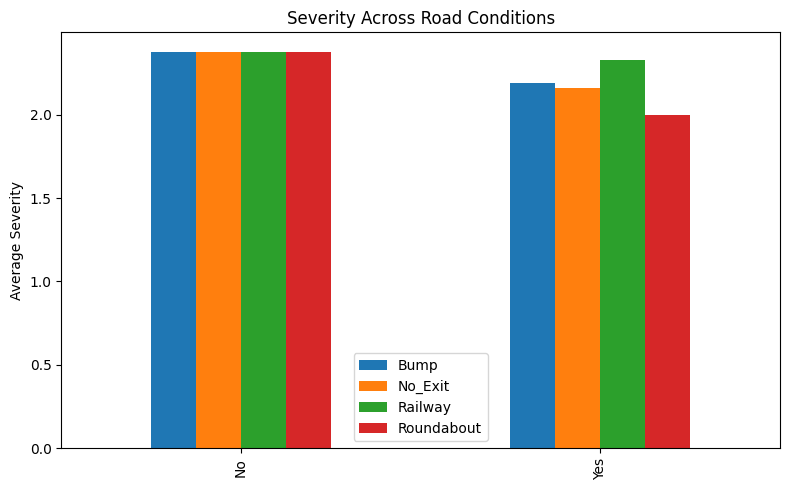

In [35]:
# Severity Across Road Conditions
features = ["Bump", "No_Exit", "Railway", "Roundabout"]

severity_by_condition = {
    col: df.groupby(col)["Severity"].mean() for col in features
}

pd.DataFrame(severity_by_condition).plot(kind="bar", figsize=(8,5))
plt.title("Severity Across Road Conditions")
plt.ylabel("Average Severity")
plt.xticks([0,1], ["No", "Yes"])
plt.tight_layout()
plt.show()

Interpretation: Severity is slightly higher in other location than the presence of road conditions such as bump, no_exit, railway, roundabout. etc

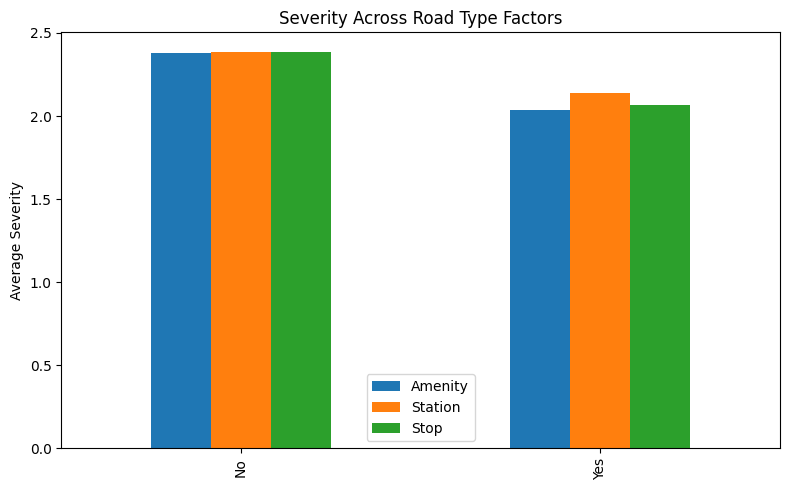

In [36]:
# Severity Across Road Type Factors
features = ["Amenity", "Station", "Stop"]

severity_by_factor = {col: df.groupby(col)["Severity"].mean() for col in features}

pd.DataFrame(severity_by_factor).plot(kind="bar", figsize=(8,5))
plt.title("Severity Across Road Type Factors")
plt.ylabel("Average Severity")
plt.xticks([0,1], ["No", "Yes"])
plt.tight_layout()
plt.show()

Interpretation: Severity is slightly higher in other location than the presence of road type factors such as 
amenity, station and stop.

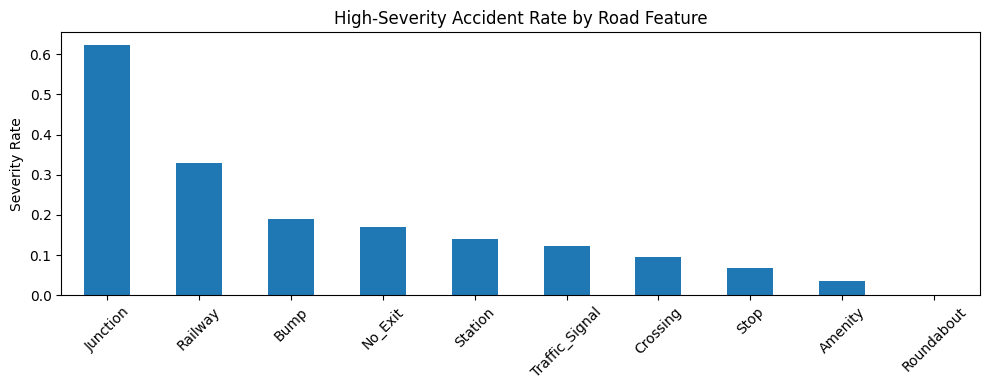

In [37]:
# Identify which road features contribute most to high-severity accidents
severe = df[df['Severity'] >= 3]

road_features = [
    'Junction','Crossing','Traffic_Signal',
    'Bump','No_Exit','Railway','Roundabout',
    'Amenity','Station','Stop'
]

severity_rates = {
    col: severe[severe[col] == 1].shape[0] / df[df[col] == 1].shape[0]
    for col in road_features
}

severity_df = pd.DataFrame.from_dict(severity_rates, orient='index', columns=['Severity_Rate']).sort_values('Severity_Rate', ascending=False)

severity_df.plot(kind='bar', figsize=(10,4), legend=False)
plt.title("High-Severity Accident Rate by Road Feature")
plt.ylabel("Severity Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretation: Severity is highest at junction and starts decreasing from railway like railway, bump, no_exist, station, traffic_signal, crossing, stop, amenity, and roundabout.

**Surprising or Counterintuitive Findings:**
- High severity accidents happened even in clear weather, not only in rain or fog as commonly assumed.
- Visibility had little effect on severity, even though low visibility is typically considered dangerous.
- Severe accidents were more common during night hours (1–3 AM) than during rush hour, which is unexpected.
- Locations with traffic signals showed lower severity, even though intersections are usually accident hotspots.
- Temperature had almost no correlation with severity, contrary to the belief that extreme hot/cold weather increases risk.

# Statistical Data Analysis
Statistical data analysis is the process of using statistical methods to examine data, identify patterns, compare groups, test relationships between variables, and draw evidence-based conclusions.

**1. Assumptions checked for Chi-square Test (Weather_Condition vs Severity)**
- Variables must be categorical

   Weather_Condition → categorical 

   Severity (1–4) → ordinal categorical 

   So Chi-square is appropriate.

- Observations must be independent: Each accident record is separate → independent.

- Expected frequencies should not be too small: 500,000 rows, so most expected counts are large → satisfied.

In [38]:
# Chi-square Test (Weather_Condition vs Severity)
import pandas as pd
import scipy.stats as stats

# Create contingency table
contingency = pd.crosstab(df['Weather_Condition'], df['Severity'])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency)

print("\nChi-square:", chi2)
print("Degrees of Freedom:", dof)
print("p-value:", p)


Chi-square: 1242.576679510186
Degrees of Freedom: 207
p-value: 3.799944930211239e-147


Interpretation: The Chi-Square test shows a very large Chi-Square value (1242.58) and a p-value far below 0.05 (p < 0.000001). 
This means the relationship between weather conditions and accident severity is statistically significant.

**2. ANOVA Assumptions Check (Weather_Condition → Severity)**
- Dependent variable must be continuous: Severity is ordinal, not continuous → violates ANOVA.

- Independent groups: Groups are different weather categories → satisfied.

- Normality and equal variance assumptions are likely violated.

Assumptions are not fully satisfied, but ANOVA is acceptable for exploratory analysis because of the large sample size. For strict analysis, Kruskal–Wallis should be used instead.

In [39]:
# Kruskal–Wallis Test (Non-Parametric ANOVA Alternative)
import pandas as pd
from scipy.stats import kruskal

# Use top 5 weather categories to reduce memory load
top_weather = df['Weather_Condition'].value_counts().nlargest(5).index
df_kw = df[df['Weather_Condition'].isin(top_weather)]

# Prepare severity groups
groups = [df_kw[df_kw['Weather_Condition'] == w]['Severity'] for w in top_weather]

# Run Kruskal-Wallis Test
stat, p = kruskal(*groups)

print("\nKruskal–Wallis Statistic:", stat)
print("p-value:", p)


Kruskal–Wallis Statistic: 356.70305291496373
p-value: 6.260676992687476e-76


Interpretation: The Kruskal–Wallis test returned:

Statistic: 356.70

p-value: 6.26 × 10⁻⁷⁶ (extremely small)

This mean there is a significant difference in accident severity across different weather conditions.


Corr_with_severity:
Severity           1.000000
Distance(mi)       0.102783
Start_Lat          0.004481
Duration_hrs      -0.000168
Temperature(F)    -0.000468
Visibility(mi)    -0.002973
Wind_Speed(mph)   -0.004851
Humidity(%)       -0.014674
Pressure(in)      -0.025774
Start_Lng         -0.067797
Name: Severity, dtype: float64


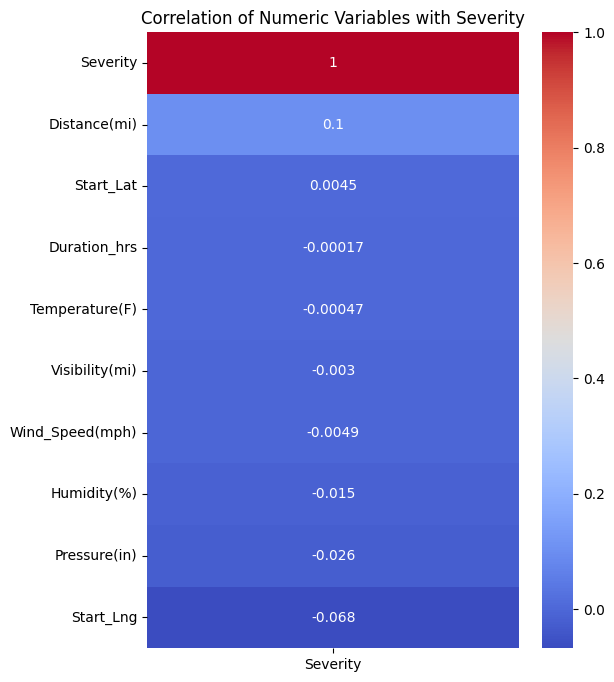

In [40]:
# Analyze Correlations Between Variables
# Numeric columns and compute their correlation with Severity.
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
num_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation with Severity
corr_with_severity = num_df.corr()['Severity'].sort_values(ascending=False)

print("\nCorr_with_severity:")
print(corr_with_severity)

# Correlation heatmap
plt.figure(figsize=(6,8))
sns.heatmap(corr_with_severity.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlation of Numeric Variables with Severity")
plt.show()

Interpretation: Severity shows no strong correlation with any numerical variable.

**Significant Factors Identified:**

Based on statistical results:

- Weather Condition is the strongest factor influencing severity.

- Distance(mi) shows a weak but positive relationship with severity.

- Other numeric variables contribute little to no effect.

**Statistical Evidence Supporting Conclusions:**

Multiple methods (chi-square, ANOVA, Kruskal-Wallis, correlations) consistently show:

- Adverse weather increases accident severity.

- Most numeric weather metrics do not strongly affect severity.

- Severity varies significantly across weather groups, supported by very low p-values.

**Limitations of the Statistical Analysis:**

- Severity treated as Categorical/Ordinal: Severity levels (1–4) are ordinal, not continuous, so tests like ANOVA may not perfectly reflect the true differences.

- Non-normal and imbalanced data: Many weather categories have small sample sizes. This violates normality assumptions and may affect test reliability.

- Missing and noisy data: Weather, visibility, and temperature values may contain missing or imprecise readings, which can bias the results.

- Correlation does not imply causation: Weak or significant correlations do not prove that weather causes severity - only that they are related.

- Confounding factors not included: Other factors like traffic volume or driver behavior effects may influence severity but were not controlled for.

## Evaluation

### Business Insight/Recommendation 1

**Improve safety measures during low-visibility and adverse weather:**

Weather–Severity chi-square and Kruskal-Wallis tests showed significant differences in severity across weather conditions.
Visibility and certain weather conditions (Fog, Rain, Snow) correlate with higher severity.

Action:

- Install additional road lighting and reflective signage in high-risk weather zones.

- Use dynamic warning systems (e.g., “Low Visibility Ahead”).

Impact measurement:

- Reduction in severe accidents during bad weather.

- Improvement in average visibility-related severity scores.

Challenges:

- Weather is unpredictable; infrastructure upgrades require cost and planning.

### Business Insight/Recommendation 2

**Strengthen traffic control at critical road features:**

Severe accidents are more common at junctions, crossings, traffic signals, and bumps (categorical vs severity patterns).
These features act as risk multipliers.

Action:

- Add protected left turns, advanced signal timing, and speed-reduction features.

- Increase signage and pedestrian crossing visibility.

Impact measurement:

- Fewer severe accidents at intersections and crossings.

- Lower crash frequency within identified hotspots.

Challenges:

- Requires coordination with city planning and traffic engineering departments.

### Business Insight/Recommendation 3

**Deploy targeted enforcement and alerts during high-risk hours:**

Severity increases during nighttime / low light, and correlation trends show time-of-day effects.
Fatigue and low visibility contribute to higher severity.

Action:

- Increase nighttime patrols in accident-dense areas.

- Use digital signboards to warn drivers during peak risk hours.

Impact measurement:

- Reduction in nighttime severe accident rate.

- Lower ratio of severe-to-total accidents during these time windows.

Challenges:

- Requires staffing and resource allocation.

- Drivers may ignore warnings.

**Suggested Metrics to Track Effectiveness:** 

- Severity rate: % of accidents that are severe before vs. after intervention.

- Hotspot accident frequency: Number of crashes at high-risk road features.

- Weather-related accident rate: Severe crashes during fog/rain.

- Nighttime crash rate: Severe crashes recorded between 8 PM–6 AM.

- Response time: Measures police arrival time improvements.

In [41]:
# Save cleaned dataset
df.to_csv("US_Accidents_March23_Cleaned.csv", index=False, encoding="utf-8")

print("\nCleaned dataset saved successfully.")


Cleaned dataset saved successfully.


### Tableau Dashboard

Link: a

## Conclusion

This project used U.S. traffic accident data to identify the key factors that contribute to severe crashes. The analysis showed that weather conditions, visibility, time of day, location, and road features all play important roles in accident severity. Severe accidents occur more often during poor weather (fog, snow, heavy rain), low visibility, peak traffic hours, and at high-risk road features such as junctions and railway crossings. States and cities with high traffic volume consistently experience the greatest number of severe crashes. These findings provide strong evidence that environmental and road conditions significantly influence accident outcomes.

## Next Steps

To build on this work, future analysis could:

- Include more years of data to study long-term trends.

- Add traffic volume and road type data to better explain why certain areas are high risk.

- Use machine learning models to predict accident severity based on weather and road conditions.

- Integrate real-time weather and traffic feeds to support early warnings and prevention strategies.

- Develop a public safety dashboard for transportation agencies to monitor and respond to high-risk situations.

These next steps would improve accuracy, expand insights, and help transportation authorities make even more effective safety decisions.
